In [1]:
import nxsdk.api.n2a as nx
import os
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
from gridAgent import *

In [3]:
grid_x = 5
grid_y = 5
dimensions = 2

n_states = grid_x * grid_y
n_actions = 4
n_estimates = n_states * n_actions
n_replicates = 3

In [4]:
n_estimates

100

In [5]:
t_epoch = 64
n_epochs = 1000

In [6]:
agent = GridAgent(n_epochs=n_epochs, debug=False, n_replicates=n_replicates)

In [7]:
agent.hippocampus.blocks

{'feedback_delay': <primitives.OrNode at 0x7f077109e630>,
 'feedback_sum': <primitives.OrNode at 0x7f0771101128>,
 'filter': <primitives.AndNode at 0x7f077110b470>,
 'punishment_buffer': <primitives.OrNode at 0x7f077109e1d0>,
 'punishment_gate': <primitives.AndNode at 0x7f0771101be0>,
 'reward_buffer': <primitives.OrNode at 0x7f077109ee80>,
 'reward_gate': <primitives.AndNode at 0x7f07711016a0>,
 'state_memory': <primitives.FlipFlopNode at 0x7f077110bda0>}

In [8]:
#dec_spks = agent.decoder.get_outputs().probe(nx.ProbeParameter.SPIKE)

In [9]:
#enc_spks = agent.encoder.get_outputs().probe(nx.ProbeParameter.SPIKE)

In [10]:
#hc_spks = agent.hippocampus.blocks['state_memory'].get_outputs().probe(nx.ProbeParameter.SPIKE)

In [11]:
#ctx_spks = agent.cortex.get_outputs().probe(nx.ProbeParameter.SPIKE)

In [12]:
agent.transitions

array([[[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0]],

       [[1, 1, 1, 1, 0],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 1, 0]]])

In [13]:
agent.transitions[0,:,4]

array([1, 1, 1, 1, 0])

In [14]:
agent.transitions[1,4,:]

array([1, 1, 1, 1, 0])

In [15]:
net = agent.network

In [16]:
results = []
runs = 1
for i in range(runs):
    results.append(agent.run())

INFO:DRV:  SLURM is being run in background
INFO:DRV:  Connecting to 10.212.98.110:39715
INFO:DRV:      Host server up..............Done 0.29s
INFO:DRV:      Compiling Embedded snips....Done 0.36s
INFO:DRV:      Encoding axons/synapses.....Done 0.51s
INFO:HST:  Args chip=0 cpu=0 /homes/wolin/python3_venv/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1592442349.760666/launcher_chip0_lmt0.bin --chips=1 --remote-relay=1 --epoch=0 
INFO:DRV:      Booting up..................Done 2.09s
INFO:DRV:      Encoding probes.............Done 0.82ms
INFO:HST:  Lakemont_driver...
INFO:DRV:      Transferring probes.........Done 3.22ms
INFO:DRV:      Configuring registers.......Done 0.20s
INFO:DRV:      Transferring spikes.........Done 0.97ms
INFO:HST:  chip=0 cpu=0 Setting up...
INFO:HST:  chip=0 cpu=0 Got variables
INFO:HST:  chip=0 cpu=0 Got R/P/State/Condition compartments
INFO:HST:  chip=0 cpu=0 Got Counter compartments
INFO:HST:  chip=0 cpu=0 Got estimate locs & values, done.
IN

In [17]:
agent.board.disconnect()

INFO:HST:  chip=0 cpu=0 halted, status=0x0


In [18]:
results[-1]

(array([[1, 2, 0],
        [1, 3, 3],
        [0, 3, 3],
        ...,
        [1, 2, 1],
        [1, 2, 1],
        [2, 0, 1]]),
 array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
         0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
         0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,
         0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,
         1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  0,  1,  0,  1,  0,
         0,  0,  0,  0,  0,  1,  0,

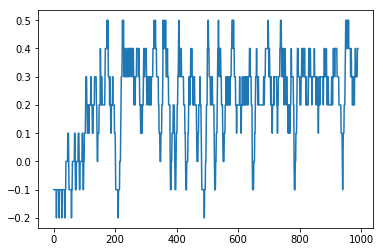

In [19]:
plt.plot(np.convolve(results[-1][1], np.ones(10),mode='valid')/10)

In [20]:
results[-1][0].shape

(1000, 3)

In [21]:
data = results[-1][0]

In [22]:
np.unique(data[:,0])

array([0, 1, 2, 3, 4])

In [23]:
np.unique(data[:,1])

array([0, 1, 2, 3, 4])

In [24]:
np.unique(data[:,2])

array([0, 1, 2, 3])

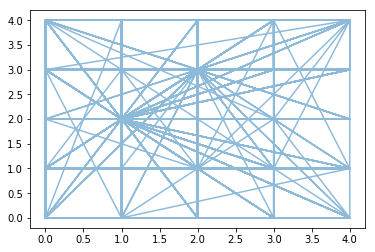

In [25]:
plt.plot(results[-1][0][:,0], results[-1][0][:,1], alpha=0.50)

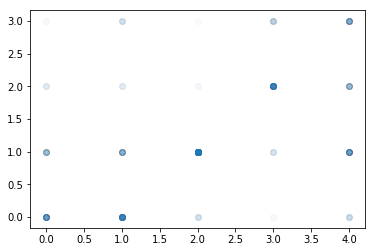

In [26]:
plt.scatter(results[-1][0][:,1], results[-1][0][:,2], alpha=0.01)

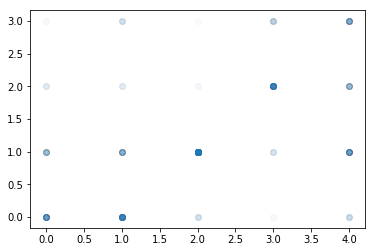

In [27]:
plt.scatter(results[-1][0][:,1], results[-1][0][:,2], alpha=0.01)

In [28]:
agent.final_estimates

array([[[1664, 1792, 1792],
        [ 768,  640,  896],
        [ 128,  128,  128],
        [-128,    0,    0],
        [   0,  128,    0],
        [3200, 3328, 3584],
        [1408, 1536, 1408],
        [ 768,  256,  768],
        [-128, -128, -128],
        [ 128,  128,    0],
        [   0,    0,    0],
        [-128, -128, -128],
        [ 768,  768,  768],
        [-128, -128, -128],
        [   0,    0,    0],
        [   0,    0,    0],
        [   0,    0, -128],
        [   0,    0,    0],
        [-128,    0, -128],
        [-128, -128,    0],
        [-128, -128,    0],
        [ 128,  128,  128],
        [   0,    0,    0],
        [-128,    0, -128],
        [-256, -256, -256]],

       [[   0,  128,    0],
        [   0,    0,    0],
        [ 256,  128,    0],
        [ 512,  640,  896],
        [1024, 1024, 1280],
        [-128, -128,    0],
        [   0,    0,    0],
        [-128, -128, -128],
        [ 896, 1024,  640],
        [1536, 1792,  768],
        [4992, 473

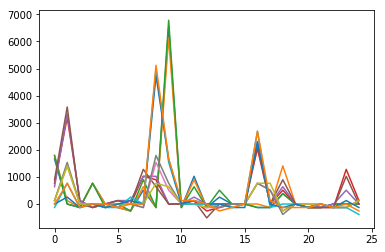

In [30]:
plt.plot(agent.final_estimates.reshape(25,12))